# Report on Training, Evaluation, and Results of Simple RNN for Sine Wave Data


# Introduction

The purpose of this project was to build, train, and evaluate a Simple Recurrent Neural Network (RNN) to predict values in a sine wave sequence. The sine wave data was generated by dividing the range from 0 to 50 into 768 evenly spaced data points. The dataset was used to train a simple RNN model with 64 neurons in the SimpleRNN layer and a final fully connected (Dense) layer. This report details the steps taken, model performance, and results of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

2024-11-09 23:01:41.913818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-09 23:01:41.913858: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Step 1: Generate Sine Wave Data

In [2]:
x = np.linspace(0, 50, 768)  # Generate 768 data points between 0 and 50
y = np.sin(x)  # Sine function to generate sine wave data

# Step 2: Prepare Training and Testing Data 

In [3]:
train_size = int(len(x) * 0.7)  # 70% for training, 30% for testing
test_size = len(x) - train_size

x_train = y[:train_size]
x_test = y[train_size:]

 # Normalize the data using MinMaxScaler to ensure that values are between 0 and 1

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()

# Prepare the data for the RNN model (use a sliding window approach)

In [5]:
sequence_length = 10  # Each input sequence will have 10 time steps
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(x_train, sequence_length)
x_test, y_test = create_sequences(x_test, sequence_length)

# Reshape data to be in the format (samples, time steps, features)

In [6]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Step 3: Build the Simple RNN Model

In [7]:
model = Sequential()
model.add(SimpleRNN(64, activation='tanh', input_shape=(sequence_length, 1)))  # Simple RNN layer with 64 units
model.add(Dense(10))  # Fully connected layer with 10 output neurons

2024-11-09 23:01:44.130854: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-11-09 23:01:44.130896: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-11-09 23:01:44.130922: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tf2-keras-ann-vm): /proc/driver/nvidia/version does not exist
2024-11-09 23:01:44.131199: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile the model

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 4,874
Trainable params: 4,874
Non-trainable params: 0
_________________________________________________________________


# Step 4: Train the Model


In [10]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/50
33/33 [==============================] - 1s 11ms/step - loss: 0.0664 - mae: 0.1789 - val_loss: 0.0110 - val_mae: 0.0827
Epoch 2/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0058 - mae: 0.0604 - val_loss: 0.0023 - val_mae: 0.0404
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0393 - val_loss: 0.0015 - val_mae: 0.0337
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0026 - val_mae: 0.0393
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0325 - val_loss: 0.0011 - val_mae: 0.0279
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0291 - val_loss: 8.9938e-04 - val_mae: 0.0255
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 9.8644e-04 - mae: 0.0261 - val_loss: 8.9077e-04 - val_mae: 0.0246
Epoch 8/50
33/33 [==============================] - 0s 4ms/step - loss: 8.433

# Step 5: Evaluate the Model

In [11]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

7/7 [==============================] - 0s 2ms/step - loss: 4.1525e-05 - mae: 0.0051
Test Loss: 4.152499241172336e-05, Test MAE: 0.005129978060722351


# Step 6: Plot Training and Validation Loss

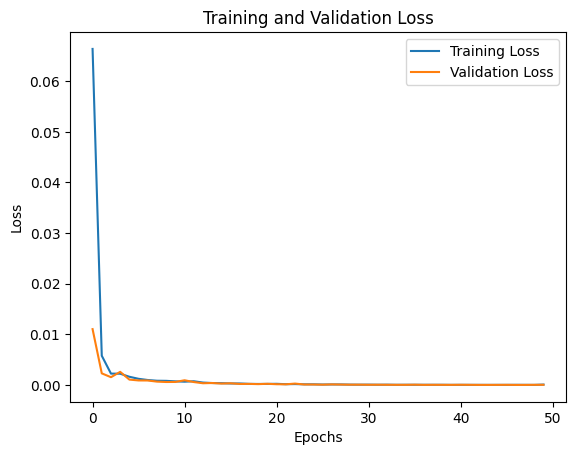

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Step 7: Make Predictions

In [13]:
y_pred = model.predict(x_test)

# Plotting Test vs Prediction

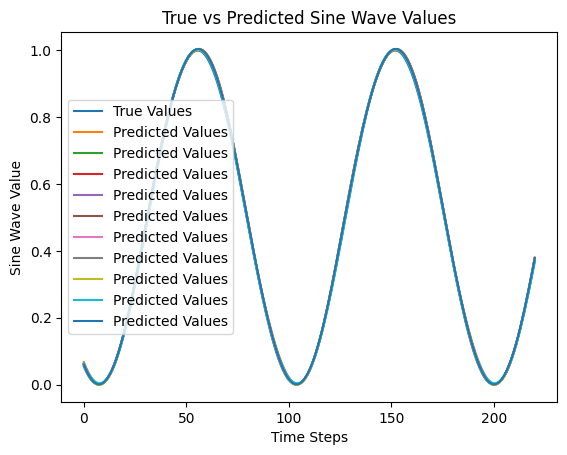

In [14]:
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Sine Wave Value')
plt.title('True vs Predicted Sine Wave Values')
plt.show()

In [15]:
# Part #4 